# Neural Network Classification with PyTorch

Classification is a problem of predicting whether something is one thing or another(there can be multiple things to calssify as well).

### [Resource](https://www.learnpytorch.io/02_pytorch_classification/)

## 1. Prepare Classification Data
### [Scikit-learn Toy datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html)

In [1]:
import sklearn
from sklearn.datasets import make_circles

# Sampling 1000 data
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

len(X), len(y)

(1000, 1000)

In [2]:
X, y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [3]:
# Make dataframe of circle data
import pandas as pd

circles = pd.DataFrame({'X1': X[:, 0],
                        'X2': X[:, 1],
                        'label': y})

circles.sample(5)

,X1,X2,label
169,-0.748444,-0.670130,0
45,-0.910861,-0.350304,0
899,0.768915,-0.073249,1
36,-0.568205,0.570636,1
913,0.593046,0.564774,1


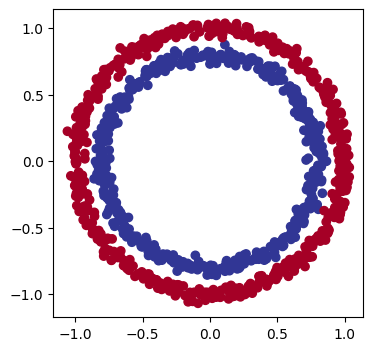

In [4]:
# Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.scatter(x = X[:, 0],
            y = X[:, 1],
            c = y,
            cmap = plt.cm.RdYlBu);

*Note: The data we're working with is often referred to as a [toy dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html), a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.*

In [5]:
# Check input and output shapes
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
print(f'X[0]:{X[0]}\ny[0]:{y[0]}')
print(f'Shape of X[0]:{X[0].shape}\nShape of y[0]:{y[0].shape}')

X[0]:[0.75424625 0.23148074]
y[0]:1
Shape of X[0]:(2,)
Shape of y[0]:()


### Turn Data into Tensors

In [7]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

print(torch.__version__)

# Seting device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

2.1.0+cu121
cpu


In [8]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [9]:
X = torch.from_numpy(X).type(torch.float)   # float is default for float32
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [10]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

### Random data split into training and test sets

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,  # 80%: train | 20% test
                                                    random_state = 42)

In [12]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [13]:
X_train.shape

torch.Size([800, 2])

## 2. Building a model
- Build a model to classify blue and red dots
  - Use subclass `nn.Module` to create PyTorch modules
  - Create two `nn.Linear` layers capable of handling shapes of our data
  - Define `forward()` method that outlines the forward computation of the model
  - Instantiate an instance of model class and send it to target `device`
  

In [14]:
# Define subclass nn.Module
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    # Create two nn.Linear layers
    self.layer_1 = nn.Linear(in_features = 2,     # takes 2 input features (must be same shape as X)
                             out_features = 8)    # upscales to 8 features (hidden neurons)
    self.layer_2 = nn.Linear(in_features = 8,     # takes 8 features from previous layer (hidden neurons)
                             out_features = 1)    # outputs a single feature (must be same shape as y)

  # Define forward method
  def forward(self, x):
    return self.layer_2(self.layer_1(x))    # x(data) -> layer_1(computation) ->layer_2(computation) -> final_output

In [15]:
# Instantiate instance of model class
model = CircleModel().to(device)
model

CircleModel(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=1, bias=True)
)

In [16]:
next(model.parameters()).device

device(type='cpu')

In [17]:
# Replicate the model using nn.Sequential
# [Easier way but its better to create class model]
model = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 8),
    nn.Linear(in_features = 8, out_features = 1)
).to(device)

model

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=1, bias=True)
)

In [18]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4063,  0.2299],
                      [-0.1867,  0.0264],
                      [-0.0887,  0.1000],
                      [-0.5563, -0.5490],
                      [-0.5032,  0.1145],
                      [-0.6809, -0.0260],
                      [-0.3974, -0.0828],
                      [-0.5241, -0.0044]])),
             ('0.bias',
              tensor([-0.3866, -0.6989, -0.2111, -0.5782,  0.6541, -0.1365, -0.6633, -0.6738])),
             ('1.weight',
              tensor([[ 0.1987,  0.1351, -0.1619,  0.2288,  0.0585, -0.1580,  0.3500, -0.0636]])),
             ('1.bias', tensor([0.2313]))])

In [19]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model(X_test.to(device))

len(untrained_preds), untrained_preds.shape, torch.round(untrained_preds[:10])

(200,
 torch.Size([200, 1]),
 tensor([[-0.],
         [-0.],
         [-0.],
         [-0.],
         [-0.],
         [-0.],
         [-0.],
         [-0.],
         [-0.],
         [-0.]]))

In [20]:
# Test samples
len(X_test), X_test.shape, X_test[:10], y_test[:10]

(200,
 torch.Size([200, 2]),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

- Define loss function and optimizer
  - Which loss function and optimizer should we use?</br>
    *Ans: **Choosing loss function and optimizers are problem specific.**</br>*

    - *In case of loss function:</br>
    For `linear regression`, [MAE(Mean Absolute Error)](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html) or [MSE(Mean Squared Error)](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html) is suitable.</br>*

      *For `classification`, [Binary Cross Entropy(cross entropy)](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) is suitable.</br>*

    - *As for optimizers:</br>
    [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) and [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam) optimizers are most common*

  *Note: For the loss function, we are currently choosing `torch.nn.BCEWithLogitsLoss()`. This has [sigmoid activation function](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6) built-in.*

  - [About Binary Cross Entropy(BCE)](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a)

  - [Definition of logit](https://stackoverflow.com/questions/41455101/what-is-the-meaning-of-the-word-logits-in-tensorflow)

In [21]:
# Setting up loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model.parameters(),
                            lr = 0.1)

In [22]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## 3. Train/Test Loop
- Forward pass
- Calculate loss
- Optimizer zero grad
- Loss backward (backpropagation)
- Optimzier step (gradient descent)

### Going from raw logits -> prediction probabilites -> prediction labels
We can convert these *logits* into prediction probabilities by passing them to some kind of activation function.

*Example: Sigmoid for binary classification and softmax for multiclass classification.*

Then we can convert our model's prediction probabilities to *prediction labels* by either rounding them or taking `argmax()`

In [23]:
# View first 5 outputs of the forward pass on the test data
model.eval()
with torch.inference_mode():
  y_logits = model(X_test.to(device))[:5]

y_logits, y_test[:5]

(tensor([[-0.2111],
         [-0.2749],
         [-0.0730],
         [-0.2500],
         [-0.1196]]),
 tensor([1., 0., 1., 0., 1.]))

In [24]:
# Use sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4474],
        [0.4317],
        [0.4818],
        [0.4378],
        [0.4701]])

For our prediction probability values, we need to perform a range style rounding on them

- y_pred_probs >=0.5, y=1 (class1)
- y_pred_probs <0.5, y=0 (class0)

In [25]:
# Find predicted labels
y_preds = torch.round(y_pred_probs)

y_preds

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [26]:
# logits -> prediction probabilites -> prediction labels
y_pred_labels = torch.round(torch.sigmoid(model(X_test.to(device))[:5]))
# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

In [27]:
# Buidling training loop
torch.manual_seed(42)

epochs = 100

# Placing data on CUDA
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Train Loop
for epoch in range(epochs):
  model.train()

  # Forward Pass
  y_logits = model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))   # turn logits -> pred probabilites -> pred labels

  # Calculate loss & accuracy
  # loss = loss_fn(torch.sigmoid(y_logits))   # nn.BCELoss expects prediction probabilities as input
  loss = loss_fn(y_logits, y_train)   # y_logits is taken due to loss_fn = nn.BCEWithLogitsLoss()
  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Loss backward
  loss.backward()

  # Optimizer step
  optimizer.step()

  # Testing
  model.eval()
  with torch.inference_mode():
    # Forward pass
    test_logits = model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # Test loss & accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

  # Print out epochs train/test calculation
  if epoch % 10 == 0 or epoch == epochs - 1:
      print(f'Epoch: {epoch} ---- Train Loss: {loss:.4f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%')

Epoch: 0 ---- Train Loss: 0.6983 | Acc: 50.00% | Test Loss: 0.6942 | Test Acc: 50.00%
Epoch: 10 ---- Train Loss: 0.6946 | Acc: 45.50% | Test Loss: 0.6918 | Test Acc: 50.50%
Epoch: 20 ---- Train Loss: 0.6939 | Acc: 48.12% | Test Loss: 0.6917 | Test Acc: 53.50%
Epoch: 30 ---- Train Loss: 0.6937 | Acc: 48.75% | Test Loss: 0.6919 | Test Acc: 52.00%
Epoch: 40 ---- Train Loss: 0.6936 | Acc: 49.38% | Test Loss: 0.6921 | Test Acc: 54.50%
Epoch: 50 ---- Train Loss: 0.6935 | Acc: 49.12% | Test Loss: 0.6923 | Test Acc: 53.00%
Epoch: 60 ---- Train Loss: 0.6935 | Acc: 49.75% | Test Loss: 0.6925 | Test Acc: 49.50%
Epoch: 70 ---- Train Loss: 0.6934 | Acc: 50.00% | Test Loss: 0.6926 | Test Acc: 52.00%
Epoch: 80 ---- Train Loss: 0.6933 | Acc: 50.38% | Test Loss: 0.6928 | Test Acc: 49.00%
Epoch: 90 ---- Train Loss: 0.6933 | Acc: 50.62% | Test Loss: 0.6929 | Test Acc: 49.00%
Epoch: 99 ---- Train Loss: 0.6933 | Acc: 50.88% | Test Loss: 0.6930 | Test Acc: 48.50%


## 4. Make Predictions and Evaluate the model
From the metrics it looks like our model isn't learning anything.
So to inspect it, lets make some predictions and make them visual.

Importing a function called [`plot_decision_boundary()`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py)


In [28]:
import requests
from pathlib import Path

# Download helper function from opensource scripts files
if Path('helper_functions.py').is_file():
  print('helper_functions.py already exists, skipping download')
else:
  print('Downloading helper_function.py')
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)
  print('Download complete')

helper_functions.py already exists, skipping download


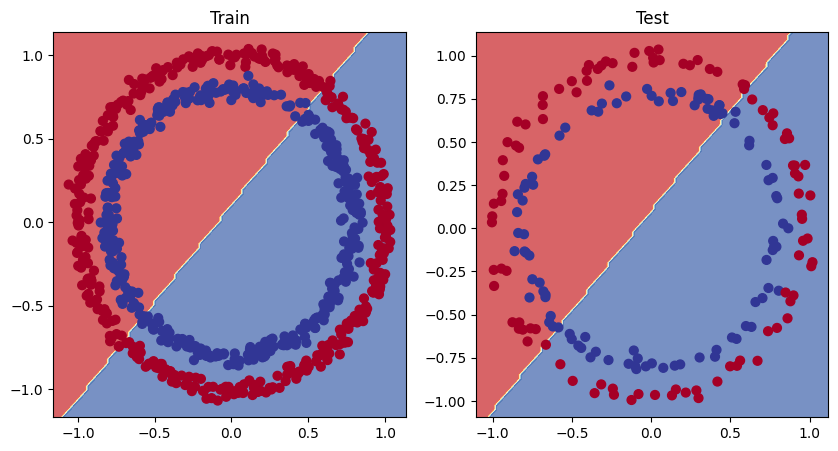

In [29]:
from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model, X_test, y_test)

## 5. Improving a model(from a model perspective)
- Add more layers *(give model more chances to learn about patterns in the data*)
- Add more hidden units *(give model more chances to learn about patterns in the data*)
- Fit for longer *(more epochs*)
- Changing the activation functions *(Softmax, Relu, Gelu and so on*)
- Changing learning rate *(0.01, 0.001, 0.0001*)
- Changing loss function

Lastly, from data perspective, increasing data is also an option.

In [30]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [31]:
# Builiding improved model
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features = 2, out_features = 16)
    self.layer_2 = nn.Linear(in_features = 16, out_features = 16)
    self.layer_3 = nn.Linear(in_features = 16, out_features = 1)

  def forward(self, x):
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)
    return z
    # return self.layer_3(self.layer_2(self.layer_1(x)))  # Also can be written in this way much faster computation

model_v1 = CircleModelV1().to(device)
model_v1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=1, bias=True)
)

In [32]:
# Setting up loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_v1.parameters(), lr = 0.1)

In [33]:
# Buidling training loop
torch.manual_seed(42)

epochs = 1000

# Placing data on CUDA
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Train Loop
for epoch in range(epochs):
  model_v1.train()

  # Forward Pass
  y_logits = model_v1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))   # turn logits -> pred probabilites -> pred labels

  # Calculate loss & accuracy
  # loss = loss_fn(torch.sigmoid(y_logits))   # nn.BCELoss expects prediction probabilities as input
  loss = loss_fn(y_logits, y_train)   # y_logits is taken due to loss_fn = nn.BCEWithLogitsLoss()
  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Loss backward
  loss.backward()

  # Optimizer step
  optimizer.step()

  # Testing
  model_v1.eval()
  with torch.inference_mode():
    # Forward pass
    test_logits = model_v1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # Test loss & accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

  # Print out epochs train/test calculation
  if epoch % 100 == 0 or epoch == epochs - 1:
    print(f'Epoch: {epoch} ---- Train Loss: {loss:.4f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%')

Epoch: 0 ---- Train Loss: 0.6962 | Acc: 50.00% | Test Loss: 0.6934 | Test Acc: 50.00%
Epoch: 100 ---- Train Loss: 0.6930 | Acc: 51.25% | Test Loss: 0.6941 | Test Acc: 46.00%
Epoch: 200 ---- Train Loss: 0.6930 | Acc: 51.25% | Test Loss: 0.6946 | Test Acc: 45.00%
Epoch: 300 ---- Train Loss: 0.6930 | Acc: 51.12% | Test Loss: 0.6947 | Test Acc: 46.00%
Epoch: 400 ---- Train Loss: 0.6930 | Acc: 51.00% | Test Loss: 0.6947 | Test Acc: 46.00%
Epoch: 500 ---- Train Loss: 0.6930 | Acc: 51.00% | Test Loss: 0.6947 | Test Acc: 46.00%
Epoch: 600 ---- Train Loss: 0.6930 | Acc: 51.00% | Test Loss: 0.6947 | Test Acc: 46.00%
Epoch: 700 ---- Train Loss: 0.6930 | Acc: 51.00% | Test Loss: 0.6947 | Test Acc: 46.00%
Epoch: 800 ---- Train Loss: 0.6930 | Acc: 51.00% | Test Loss: 0.6947 | Test Acc: 46.00%
Epoch: 900 ---- Train Loss: 0.6930 | Acc: 51.00% | Test Loss: 0.6947 | Test Acc: 46.00%
Epoch: 999 ---- Train Loss: 0.6930 | Acc: 51.00% | Test Loss: 0.6947 | Test Acc: 46.00%


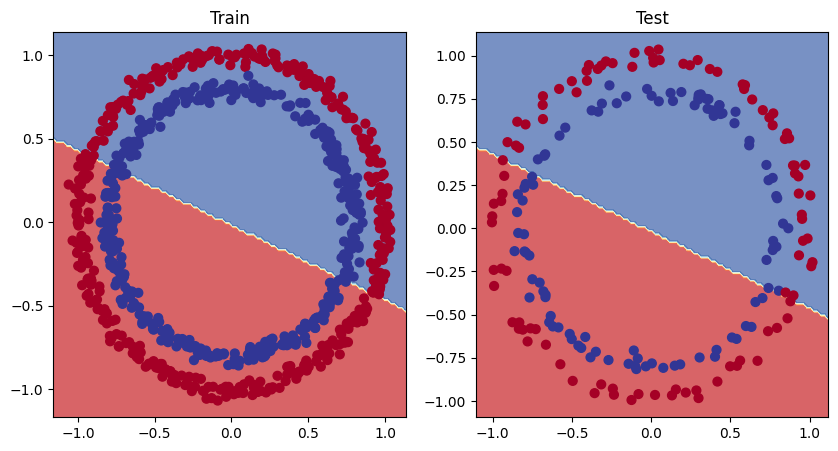

In [34]:
# Plot decison boundary
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_v1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_v1, X_test, y_test)

### Preparing dat to see if iurm odel can fit in a straight line
One way to troubleshoot to a larger problem is to test out a smaller problem


In [35]:
# Create some data (same as 00_Pytorch_workflow)
weight = 0.7
bias = 0.3
start, end, step = 0, 1, 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim = 1)
y_regression = weight * X_regression + bias

print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [36]:
# Create train/test split
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

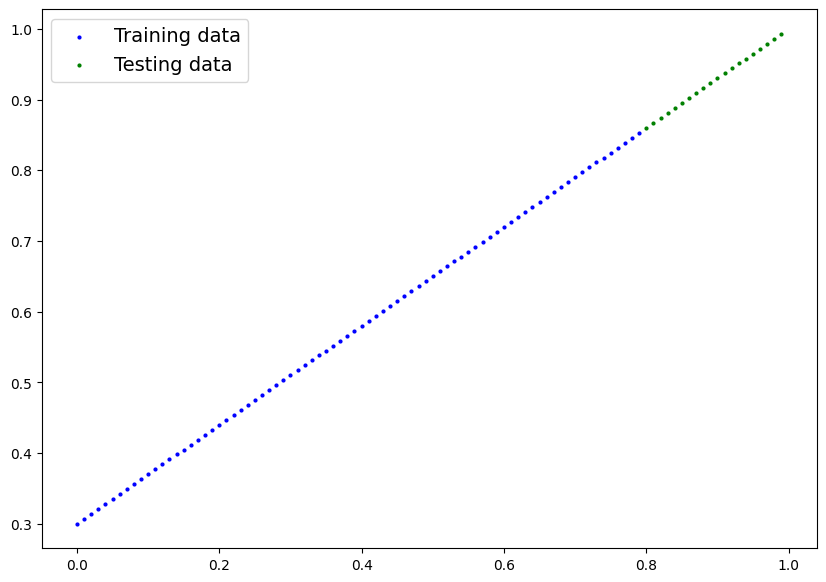

In [37]:
plot_predictions(train_data = X_train_regression,
                 train_labels = y_train_regression,
                 test_data = X_test_regression,
                 test_labels = y_test_regression)

### Adjusting `model_v1` to fit a straight line

In [38]:
# Same architecture as model_v1 (but using nn.Sequential())
model_v2 = nn.Sequential(
    nn.Linear(in_features = 1, out_features = 16),
    nn.Linear(in_features = 16, out_features = 16),
    nn.Linear(in_features = 16, out_features = 1),
).to(device)

model_v2

Sequential(
  (0): Linear(in_features=1, out_features=16, bias=True)
  (1): Linear(in_features=16, out_features=16, bias=True)
  (2): Linear(in_features=16, out_features=1, bias=True)
)

In [39]:
# Setting up loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_v2.parameters(), lr = 0.01)

In [40]:
# Buidling training loop
torch.manual_seed(42)

epochs = 1000

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Train Loop
for epoch in range(epochs):
  model_v2.train()
  y_pred = model_v2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)   # y_logits is taken due to loss_fn = nn.BCEWithLogitsLoss()
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_v2.eval()
  with torch.inference_mode():
    test_pred = model_v2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print out epochs train/test calculation
  if epoch % 100 == 0 or epoch == epochs - 1:
    print(f'Epoch: {epoch} ---- Train Loss: {loss:.4f} | Test Loss: {test_loss:.4f}')

Epoch: 0 ---- Train Loss: 0.4471 | Test Loss: 0.6953
Epoch: 100 ---- Train Loss: 0.0286 | Test Loss: 0.1269
Epoch: 200 ---- Train Loss: 0.0325 | Test Loss: 0.1199
Epoch: 300 ---- Train Loss: 0.0304 | Test Loss: 0.1108
Epoch: 400 ---- Train Loss: 0.0312 | Test Loss: 0.1057
Epoch: 500 ---- Train Loss: 0.0304 | Test Loss: 0.1006
Epoch: 600 ---- Train Loss: 0.0285 | Test Loss: 0.0964
Epoch: 700 ---- Train Loss: 0.0287 | Test Loss: 0.0959
Epoch: 800 ---- Train Loss: 0.0274 | Test Loss: 0.0920
Epoch: 900 ---- Train Loss: 0.0249 | Test Loss: 0.0850
Epoch: 999 ---- Train Loss: 0.0346 | Test Loss: 0.0051


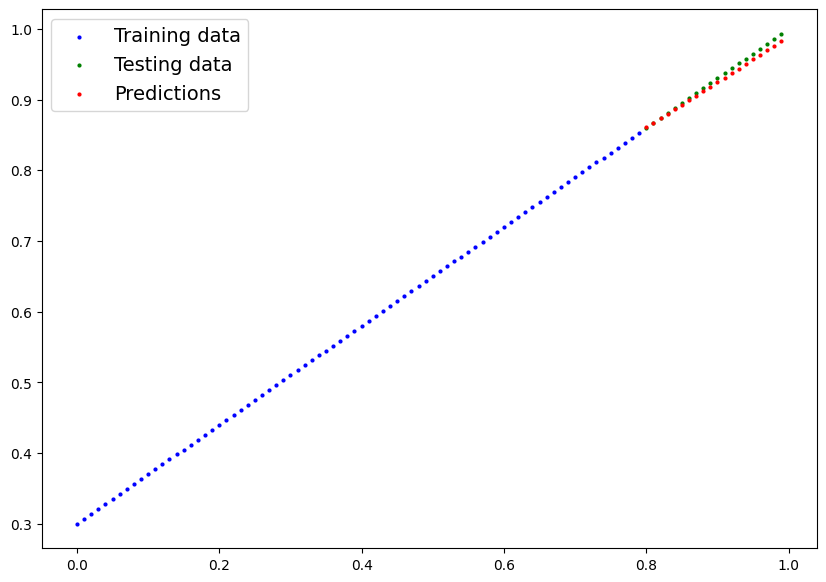

In [41]:
model_v2.eval()
with torch.inference_mode():
  y_preds = model_v2(X_test_regression)

plot_predictions(train_data = X_train_regression.cpu(),
                 train_labels = y_train_regression.cpu(),
                 test_data = X_test_regression.cpu(),
                 test_labels = y_test_regression.cpu(),
                 predictions = y_preds.cpu())

## 6. Missing Piece: Non-Linearity
"What patterns could you draw if you werew given as infinite amount of straight and non straight lines?"

Or in machine learning terms, an infinite (but really is finite) of linear and non linear functions?

### Recreating non-linear data (red and blue circles)

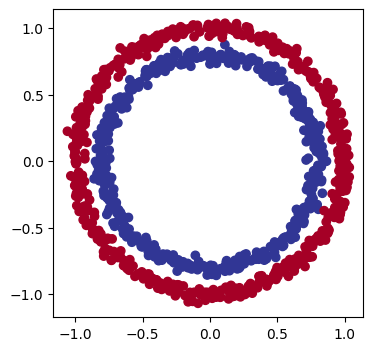

In [42]:
import sklearn
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Sampling 1000 data
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [43]:
import torch

# Converting data into tensors and splitting to train/test sets
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

### Building a non-linear model
- Linear: Straight line
- Non-Linear: Non-straight line

In [44]:
# Building a model with non linear activation functions
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features = 2, out_features = 16)
    self.layer_2 = nn.Linear(in_features = 16, out_features = 16)
    self.layer_3 = nn.Linear(in_features = 16, out_features = 1)

    # ReLU() is a non linear activation function
    self.relu = nn.ReLU()   # Takes positive input: Returns 1, for negative input: Returns 0

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_v3 = CircleModelV2().to(device)
model_v3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [45]:
# Setting up loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_v3.parameters(), lr = 0.1)

In [46]:
# Buidling training loop
torch.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Train Loop
for epoch in range(epochs):
  model_v3.train()

  # Forward Pass
  y_logits = model_v3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_v3.eval()
  with torch.inference_mode():
    test_logits = model_v3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

  # Print out epochs train/test calculation
  if epoch % 100 == 0 or epoch == epochs - 1:
    print(f'Epoch: {epoch} ---- Train Loss: {loss:.4f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%')

Epoch: 0 ---- Train Loss: 0.6975 | Acc: 50.00% | Test Loss: 0.6978 | Test Acc: 50.00%
Epoch: 100 ---- Train Loss: 0.6899 | Acc: 56.25% | Test Loss: 0.6914 | Test Acc: 51.50%
Epoch: 200 ---- Train Loss: 0.6866 | Acc: 52.88% | Test Loss: 0.6887 | Test Acc: 52.00%
Epoch: 300 ---- Train Loss: 0.6826 | Acc: 53.62% | Test Loss: 0.6858 | Test Acc: 52.50%
Epoch: 400 ---- Train Loss: 0.6774 | Acc: 54.00% | Test Loss: 0.6819 | Test Acc: 53.50%
Epoch: 500 ---- Train Loss: 0.6701 | Acc: 56.00% | Test Loss: 0.6764 | Test Acc: 55.50%
Epoch: 600 ---- Train Loss: 0.6594 | Acc: 62.38% | Test Loss: 0.6678 | Test Acc: 58.00%
Epoch: 700 ---- Train Loss: 0.6417 | Acc: 75.50% | Test Loss: 0.6533 | Test Acc: 68.50%
Epoch: 800 ---- Train Loss: 0.6128 | Acc: 87.38% | Test Loss: 0.6289 | Test Acc: 85.00%
Epoch: 900 ---- Train Loss: 0.5640 | Acc: 97.25% | Test Loss: 0.5872 | Test Acc: 93.00%
Epoch: 999 ---- Train Loss: 0.4832 | Acc: 99.25% | Test Loss: 0.5179 | Test Acc: 97.00%


### Evaluating a trained model with non linear activation functions

In [51]:
model_v3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_v3(X_test))).squeeze()

y_preds[:15], y_test[:15], y_preds[:15] == y_test[:15]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.]),
 tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         False,  True,  True,  True,  True]))

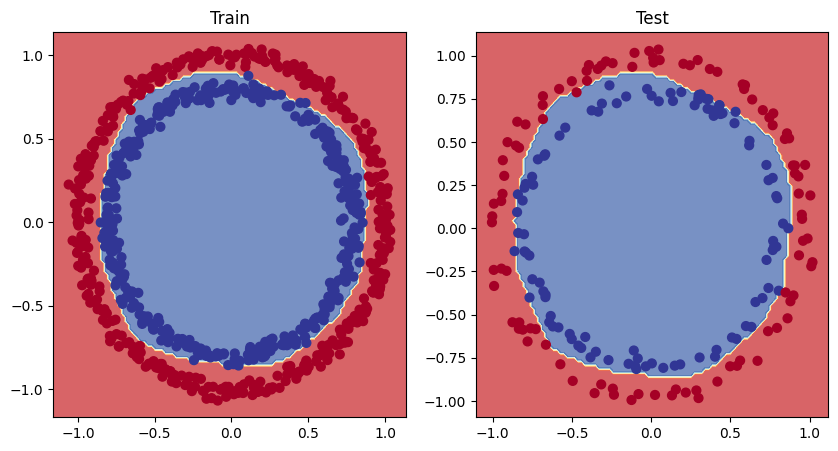

In [47]:
# Plot decison boundary
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_v3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_v3, X_test, y_test)